In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mypackage import dir

# Environment variables
modality = 'p'
project = 'australian'
data = dir.make_dir_line(modality, project) 
processed = data('processed')
models = data('models')

In [17]:
# Función para cargar datos
def cargar_datos(table_name: str) -> pd.DataFrame:
    df = pd.read_parquet(processed / f'{table_name}.parquet.gzip')
    print(f'Loaded table: {table_name}')
    return df

# Función para cargar los datos en la base de datos
def cargar_en_db(df: pd.DataFrame, table_name: str) -> None:
    df.to_parquet(models/f'{table_name}.parquet.gzip', compression='gzip')
    print(f'Saved table: {table_name}')

In [18]:
df = cargar_datos('cohortes')
df.head()

Loaded table: cohortes


,id_factura,fecha,id_cliente,quantity,valor,total_factura,InvoiceMonth,CohortMonth,CohortIndex
0,1001,2019-11-25,87,1,65.6,65.6,2019-11-01,2019-11-01,1
200,1006,2019-11-25,484,2,33.6,67.2,2019-11-01,2019-11-01,1
166,1005,2019-11-25,189,3,24.0,72.0,2019-11-01,2019-11-01,1
125,1004,2019-11-25,560,1,48.0,48.0,2019-11-01,2019-11-01,1
85,1003,2019-11-25,276,2,59.2,118.4,2019-11-01,2019-11-01,1


In [19]:
cohort_data = df.groupby(["CohortIndex", "CohortMonth"])["id_cliente"].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index = "CohortMonth", columns = "CohortIndex", values = "id_cliente")

cohort_sizes = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_sizes, axis = 0)
retention.index = retention.index.strftime("%Y-%m")

cargar_en_db(retention, 'retention')

retention

Saved table: retention


CohortIndex,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-11,1.0,0.363636,0.022727,0.090909,0.250000,0.113636,0.681818,0.250000,0.363636,0.068182,...,0.340909,0.363636,0.386364,0.227273,0.204545,0.068182,0.318182,0.272727,0.272727,0.477273
2019-12,1.0,0.097473,0.028881,0.252708,0.292419,0.480144,0.292419,0.227437,0.043321,0.234657,...,0.321300,0.469314,0.241877,0.270758,0.061372,0.252708,0.281588,0.285199,0.512635,NaN
2020-01,1.0,0.050000,0.100000,0.250000,0.550000,0.150000,0.200000,NaN,0.150000,0.400000,...,0.450000,0.200000,0.300000,0.050000,0.300000,0.300000,0.200000,0.450000,NaN,NaN
2020-02,1.0,0.200000,0.200000,0.533333,0.333333,0.400000,NaN,0.133333,0.333333,0.133333,...,0.200000,0.200000,NaN,0.133333,0.533333,0.200000,0.533333,NaN,NaN,NaN
2020-03,1.0,0.246154,0.538462,0.215385,0.292308,0.061538,0.276923,0.246154,0.292308,0.430769,...,0.307692,0.046154,0.184615,0.184615,0.292308,0.507692,NaN,NaN,NaN,NaN
2020-04,1.0,0.380952,0.222222,0.238095,0.079365,0.349206,0.253968,0.238095,0.444444,NaN,...,0.111111,0.222222,0.190476,0.269841,0.492063,NaN,NaN,NaN,NaN,NaN
2020-05,1.0,0.342105,0.315789,0.052632,0.315789,0.236842,0.250000,0.552632,0.065789,0.013158,...,0.289474,0.263158,0.250000,0.526316,NaN,NaN,NaN,NaN,NaN,NaN
2020-06,1.0,0.307692,0.153846,0.192308,0.192308,0.307692,0.384615,0.038462,0.153846,0.423077,...,0.500000,0.153846,0.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.100000,0.200000,0.300000,0.200000,0.500000,NaN,NaN,0.300000,0.100000,...,0.400000,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


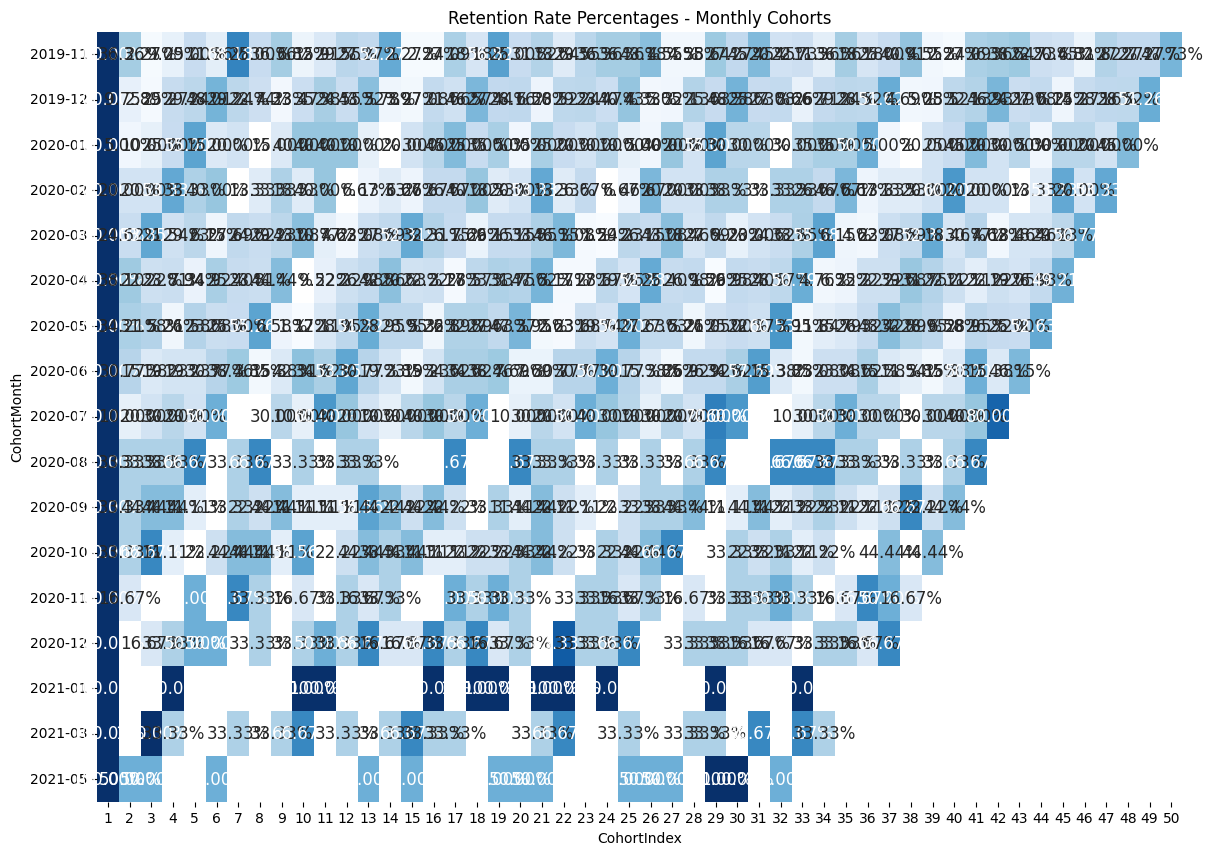

In [20]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.heatmap(retention, cmap = "Blues", annot = True, fmt = ".2%", 
            annot_kws = {"fontsize": 12}, cbar = False, ax = ax)

plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation = 0)
plt.show()

# Churn

Saved table: churn


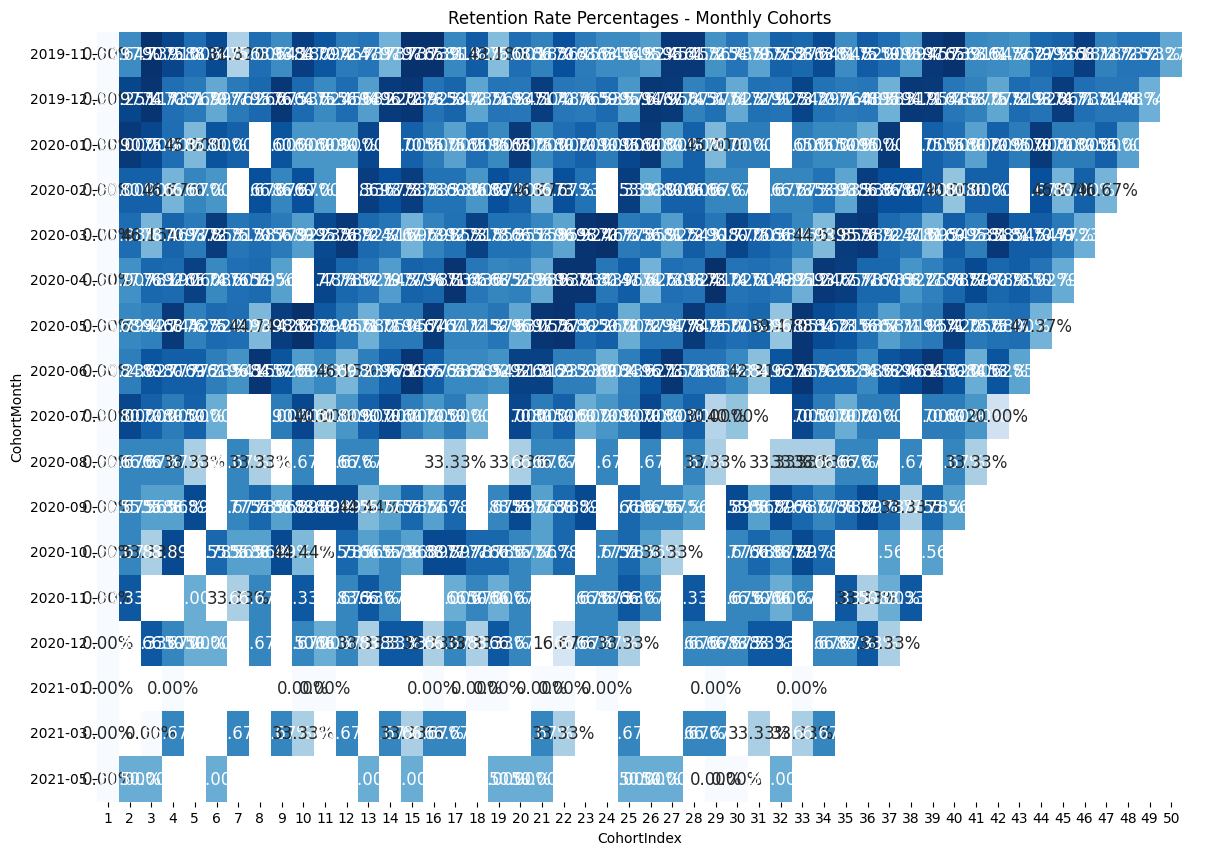

In [21]:
churn = 1 - retention

cargar_en_db(churn, 'churn')

fig, ax = plt.subplots(figsize = (14, 10))

sns.heatmap(churn, cmap = "Blues", annot = True, fmt = ".2%", 
            annot_kws = {"fontsize": 12}, cbar = False, ax = ax)

plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation = 0)
plt.show()

In [22]:
print('Ok_')

Ok_
